<a href="https://colab.research.google.com/github/krsmith/DS-Sprint-02-Storytelling-With-Data/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

### Stretch goals
- [ipywidgets](https://github.com/jupyter-widgets/ipywidgets)
- [Matplotlib animation](https://matplotlib.org/examples/animation/index.html)
- [Connected scatter plots](http://www.thefunctionalart.com/2012/09/in-praise-of-connected-scatter-plots.html)
- [Idyll markup language](https://idyll-lang.org/) for "scrollytelling"

Variables--> Visual Encodings
- Income--> x
- Lifespan--> y
- Region--> color
- Population--> size
- Year--> animation frame (alternative: small multiple or freeze frames)
- Country--> bubble/annotation

Qualitative--> Verbal
- Editorial / contextual explanation--> audio narration (alternative: text)

#Upgrade Seaborn

Make sure you have at least verion 0.9.0

In [1]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 3.6MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [5]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((44268, 3), (44370, 3), (51939, 3), (273, 33), (590, 16))

In [6]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,abw,1800,833
1,abw,1801,833
2,abw,1802,833
3,abw,1803,833
4,abw,1804,833


In [7]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [8]:
population.head()

,geo,time,population_total
0,abw,1800,19286
1,abw,1801,19286
2,abw,1802,19286
3,abw,1803,19286
4,abw,1804,19286


In [9]:
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,...,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,...,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,...,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [10]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,http://www.gapminder.org/gapminder-world/docum...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,http://spreadsheets.google.com/pub?key=t4eF8H_...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,labour_force_participation


In [0]:
df = pd.merge(income, lifespan)

In [12]:
income.shape, lifespan.shape, df.shape

((44268, 3), (44370, 3), (41790, 4))

In [13]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [14]:
variables = ['country', 'name', 'world_6region']
entities[variables].head()

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [15]:
#Preview of merge. Set to "df=" if change should be permanent.

pd.merge(df, entities[variables], how='inner', left_on='geo', right_on='country').head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,country,name,world_6region
0,abw,1800,833,34.42,abw,Aruba,america
1,abw,1801,833,34.42,abw,Aruba,america
2,abw,1802,833,34.42,abw,Aruba,america
3,abw,1803,833,34.42,abw,Aruba,america
4,abw,1804,833,34.42,abw,Aruba,america


In [0]:
df = pd.merge(df, population)

In [18]:
df = pd.merge(df, entities[variables], how='inner', left_on='geo', right_on='country')

df.drop(columns=['geo', 'country'], inplace=True)

df.rename(columns={
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': 'region'
}, inplace=True)

df.shape

(41790, 6)

In [19]:
df.describe()

,year,income,lifespan,population
count,41790.000000,41790.000000,41790.000000,4.179000e+04
mean,1909.357406,4778.593683,43.267181,1.332550e+07
std,63.322969,10502.602580,16.394240,6.502349e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,884.000000,31.200000,3.760282e+05
50%,1909.000000,1449.000000,35.500000,1.915244e+06
75%,1964.000000,3536.750000,56.340000,6.260147e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [20]:
df.describe(exclude=[np.number])

,country,region
count,41790,41790
unique,194,6
top,Vanuatu,europe_central_asia
freq,219,10991


In [21]:
df.country.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire",
       'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatoria

In [22]:
usa = df[df.country=='United States']
usa[usa.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
39399,1818,2258,39.41,9879049,United States,america
39499,1918,9371,47.18,106721812,United States,america
39599,2018,54898,79.14,326766748,United States,america


## Plot visualization

In [32]:
now = df[df.year==2018]
now.sample(15)

,year,income,lifespan,population,country,region
4864,2018,7710,72.45,382444,Belize,america
30841,2018,27909,81.30,10291196,Portugal,europe_central_asia
7977,2018,751,62.42,84004989,"Congo, Dem. Rep.",sub_saharan_africa
27775,2018,5470,78.72,6284757,Nicaragua,america
23348,2018,97057,83.24,632418,"Macao, China",east_asia_pacific
24928,2018,2021,62.91,19107706,Mali,sub_saharan_africa
37630,2018,5499,70.70,109008,Tonga,east_asia_pacific
27556,2018,5569,66.14,195875237,Nigeria,sub_saharan_africa
37192,2018,17856,70.48,5851466,Turkmenistan,europe_central_asia
5349,2018,14341,75.70,210867954,Brazil,america


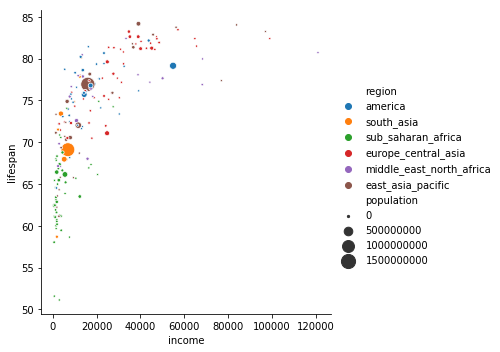

In [29]:
sns.relplot(x='income', y='lifespan', hue='region', size='population',sizes=(5,200), data=now)

In [33]:
now[now.income > 80000]

,year,income,lifespan,population,country,region
22910,2018,99034,82.39,590321,Luxembourg,europe_central_asia
23348,2018,97057,83.24,632418,"Macao, China",east_asia_pacific
31498,2018,121033,80.71,2694849,Qatar,middle_east_north_africa
33031,2018,83888,84.03,5791901,Singapore,east_asia_pacific


In [34]:
entities[entities.name=='Macao, China'].T

,145
country,mac
alt_5,MACAU SPECIAL ADMINISTRATIVE REGION OF CHINA
alternative_1,Macau
alternative_2,Macao
alternative_3,"China, Macao SAR"
alternative_4_cdiac,Macau
arb1,"Macao SAR, China"
arb2,NaN
arb3,NaN
arb4,NaN


In [0]:
qatar = now[now.country=='Qatar']
qatar_income = qatar.income.values[0]
qatar_lifespan = qatar.lifespan.values[0]

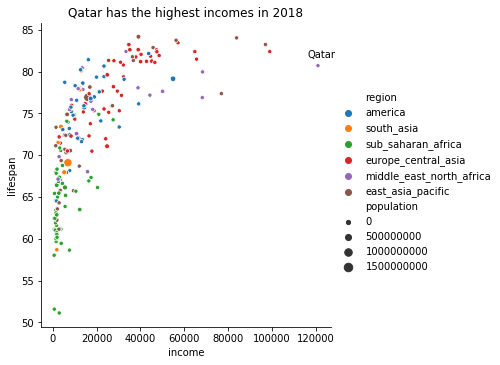

In [45]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)

plt.text(qatar_income-5000, qatar_lifespan+1, s='Qatar')

plt.title('Qatar has the highest incomes in 2018');

## Plot multiple years

In [0]:
years = [1818, 1918, 2018]

centuries = df[df.year.isin(years)]

In [47]:
centuries.sample(5)

,year,income,lifespan,population,country,region
28989,1918,1177,8.47,20971041,Pakistan,south_asia
18530,2018,33434,82.41,8452841,Israel,middle_east_north_africa
1598,1818,759,33.54,37000,Antigua and Barbuda,america
41789,2018,1952,60.18,16913261,Zimbabwe,sub_saharan_africa
8315,1918,1630,29.41,6075603,Colombia,america


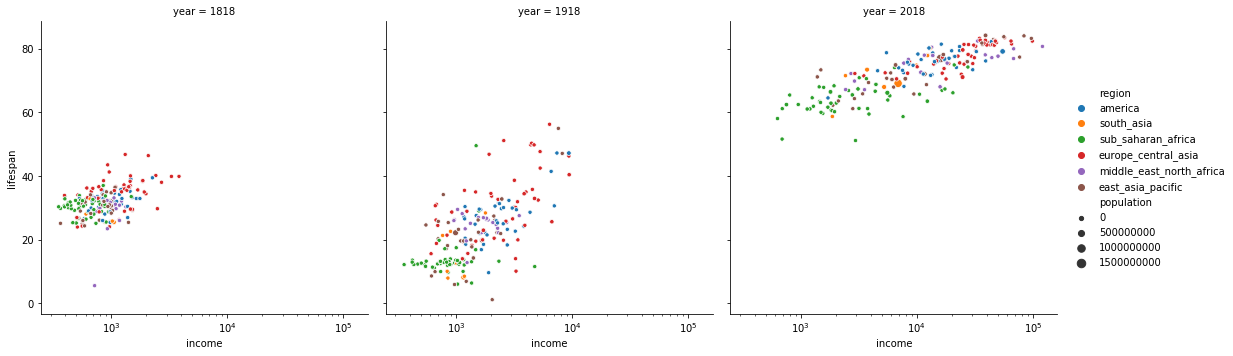

In [55]:
sns.relplot(x='income',y='lifespan', hue='region', size='population',col='year',data=centuries)

plt.xscale('log');

##Consistent countries per year?

In [56]:
centuries.groupby('year').country.count()

year
1818    190
1918    190
2018    188
Name: country, dtype: int64

In [57]:
years_per_country = centuries.groupby('country').year.count()
years_per_country[years_per_country < 3]

country
Greenland    2
Taiwan       2
Name: year, dtype: int64

##Point out a story

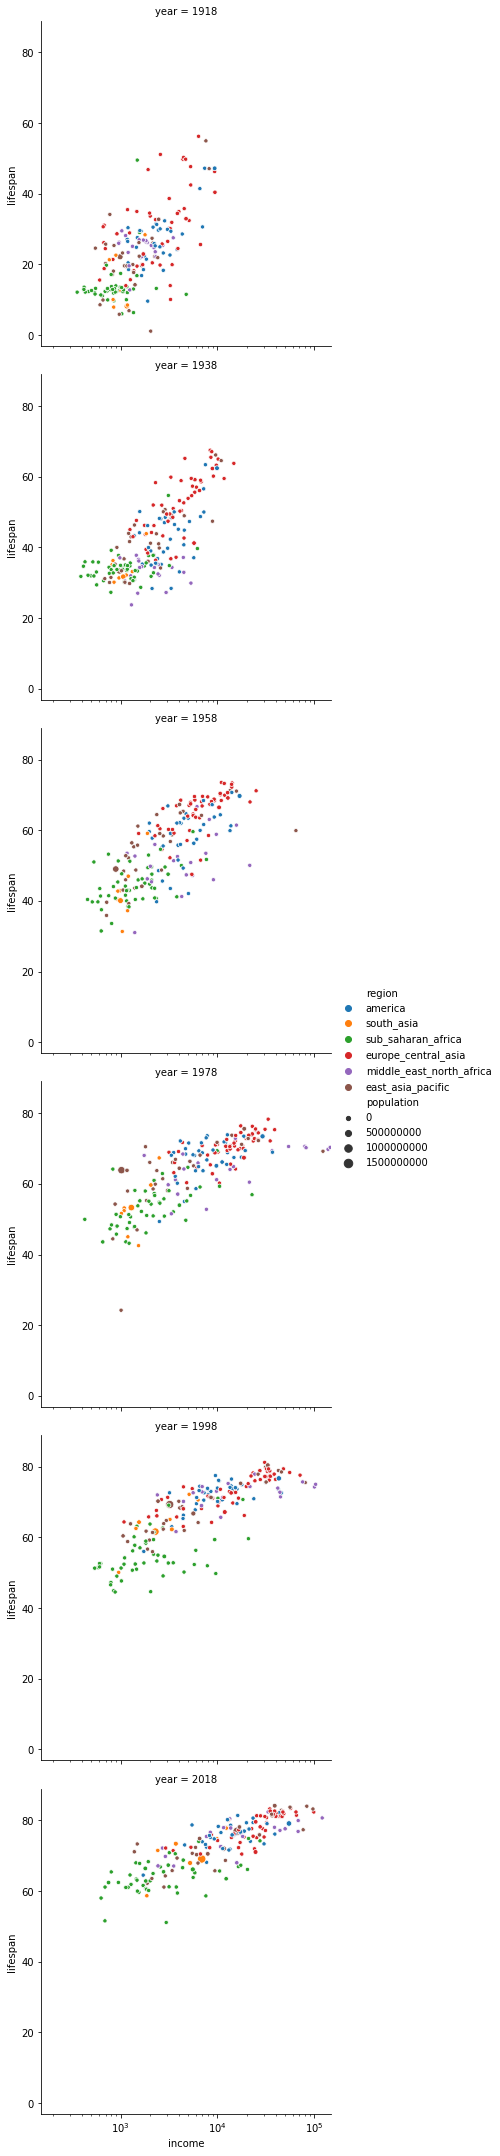

In [135]:
years = [1918, 1938, 1958, 1978, 1998, 2018]

subset = df[df.year.isin(years)]

sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            row='year', data=subset)

plt.xscale('log')
plt.xlim((150, 150000));

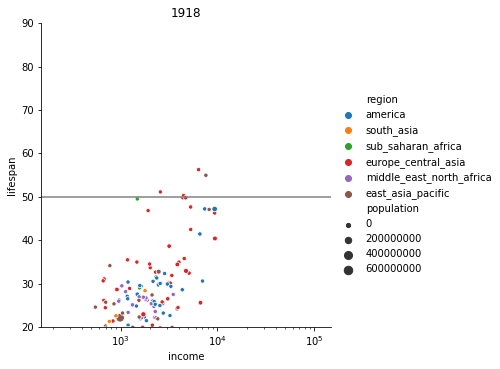

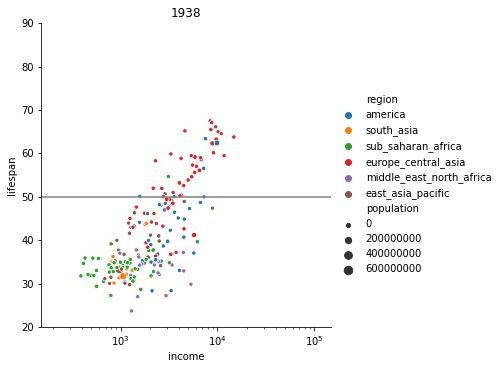

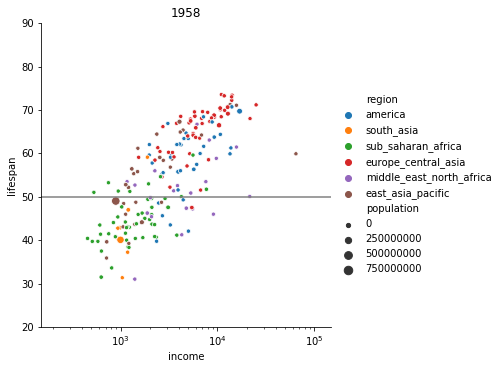

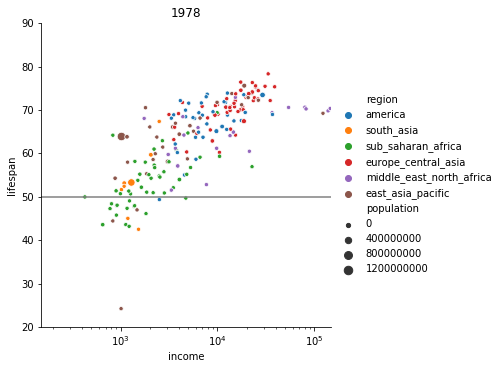

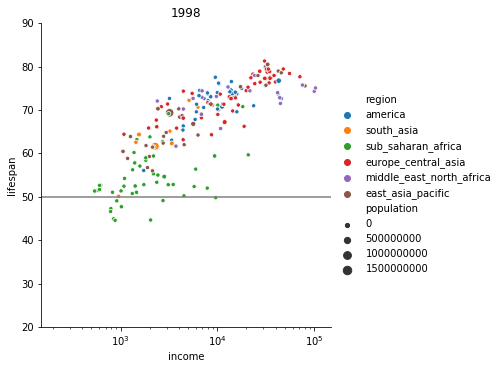

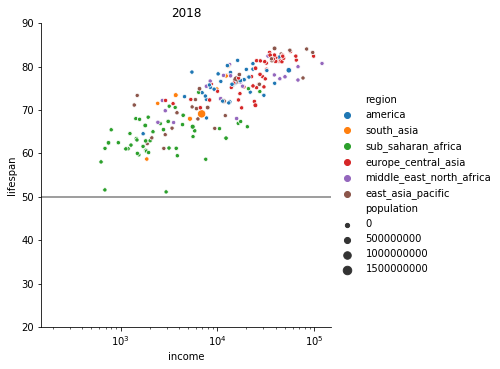

In [59]:
for year in years:

    sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=df[df.year==year])

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90))
    plt.title(year)
    plt.axhline(y=50, color='grey');

####100 years ago, few countries has lifespans above 50 years

In [60]:
df[(df.year==1918) & (df.lifespan >= 50)]

,year,income,lifespan,population,country,region
1917,1918,7610,54.95,5066003,Australia,east_asia_pacific
10333,1918,6393,56.24,3165276,Denmark,europe_central_asia
18211,1918,2576,51.11,115504,Iceland,europe_central_asia
28113,1918,4479,50.28,2576646,Norway,europe_central_asia


####Today, no country has a lifespan under 50 years

In [61]:
df[(df.year==2018) & (df.lifespan < 50)]

,year,income,lifespan,population,country,region


## Get Interactive with Google Colab

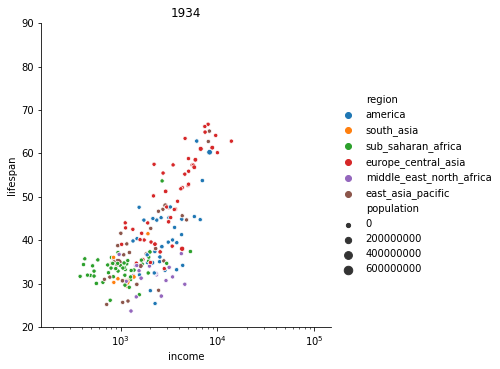

In [63]:
year = 1934 #@param {type:"slider", min:1800, max:2018, step:1}

sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            data=df[df.year==year])

plt.xscale('log')
plt.xlim((150, 150000))
plt.ylim((20, 90))
plt.title(year);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

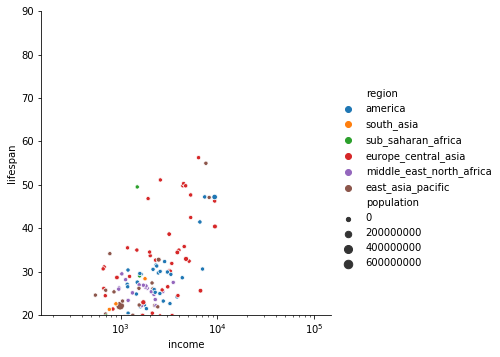

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

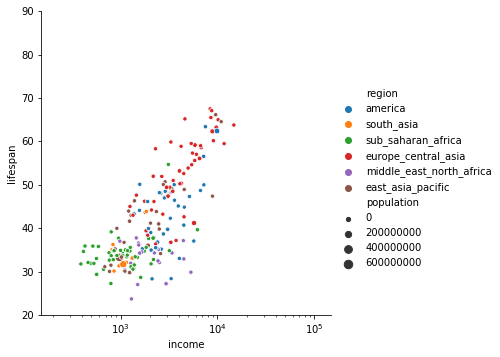

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

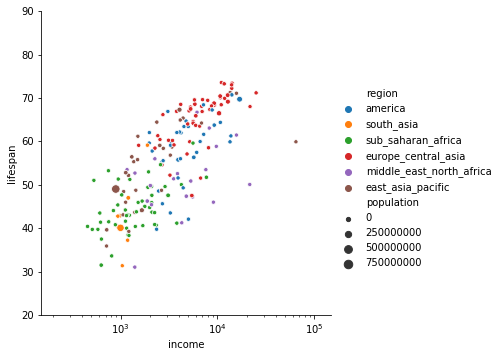

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

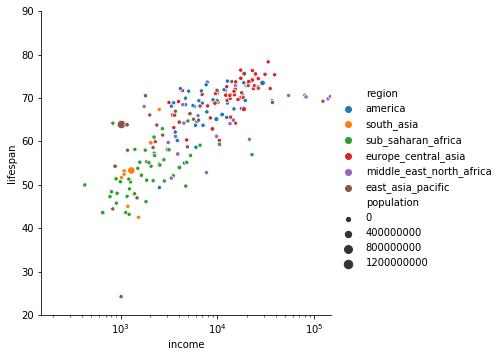

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

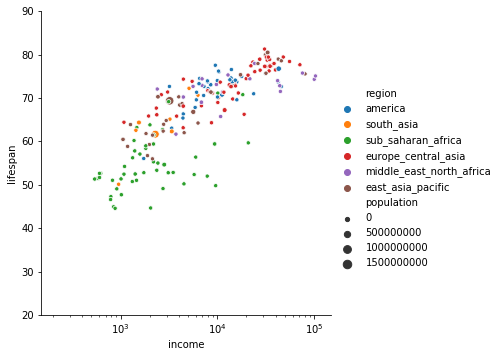

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

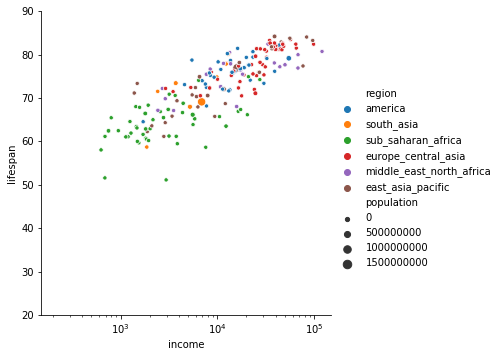

<IPython.core.display.Javascript object>

In [131]:
# Based on the example at: 
# https://colab.research.google.com/notebooks/widgets.ipynb#scrollTo=BZa2t-U5gIAB

from google.colab import widgets

def log_10_product(x, pos):
    """The two args are the value and tick position.
    Label ticks with the product of the exponentiation"""
    return '%1i' % (x)
  
  
tb = widgets.TabBar([str(year) for year in years])
for tab, year in zip(tb, years):
    ax = sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=df[df.year==year])

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90));

####Find lowest life span outlier and label it

In [139]:
now[now.lifespan < 55]

,year,income,lifespan,population,country,region
6444,2018,689,51.58,4737423,Central African Republic,sub_saharan_africa
22472,2018,2960,51.12,2263010,Lesotho,sub_saharan_africa


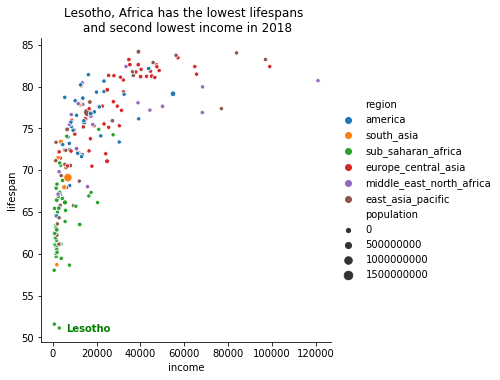

In [158]:
lesotho = now[now.country=='Lesotho']
lesotho_income = lesotho.income.values[0]
lesotho_lifespan = lesotho.lifespan.values[0]

sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)

plt.text(lesotho_income+3000, lesotho_lifespan-.5, s='Lesotho',
         color='green',weight='bold')

plt.title('Lesotho, Africa has the lowest lifespans \n and second lowest income in 2018');

### Use Child mortality instead of lifespan

In [188]:
ch_mort = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--child_mortality_0_5_year_olds_more_years_version_7--by--geo--time.csv')
ch_mort.sample(15)

,geo,time,child_mortality_0_5_year_olds_more_years_version_7
16903,lao,1868,418.7
7221,cri,2010,10.0
941,arg,1920,199.7
3551,blz,2012,17.2
8364,dnk,1920,119.9
18362,lux,1857,357.4
27492,som,1823,452.0
22161,nic,1956,207.5
27447,smr,1992,9.5
32041,usa,1988,11.9


In [190]:
df_ch = pd.merge(income,ch_mort)
df_ch.sample(15)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,child_mortality_0_5_year_olds_more_years_version_7
20403,moz,1875,408,439.80
25025,pry,1917,2818,361.30
4212,brn,1945,26177,175.00
4861,can,1933,5585,92.92
193,afg,1998,956,140.60
25969,sau,1844,883,416.20
21441,nam,1899,1761,411.70
15094,jam,1927,1478,281.10
24869,prt,1975,12088,43.50
8575,dom,1989,5634,62.00


In [0]:
df_ch_p = pd.merge(df_ch,population)

In [197]:
df_ch_p = pd.merge(df_ch_p, entities[variables], 
              how='inner', left_on='geo', right_on='country')

df_ch_p.sample(15)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,child_mortality_0_5_year_olds_more_years_version_7,population_total,country,name,world_6region
3995,brb,1942,2676,284.4,187456,brb,Barbados,america
2321,bfa,1894,523,454.7,2850955,bfa,Burkina Faso,sub_saharan_africa
10292,fji,1870,933,498.9,130490,fji,Fiji,east_asia_pacific
19964,mne,1828,1132,375.2,136191,mne,Montenegro,europe_central_asia
22975,nzl,1988,24196,12.4,3332792,nzl,New Zealand,east_asia_pacific
10878,gab,1999,18582,85.4,1200773,gab,Gabon,sub_saharan_africa
21190,mys,1853,1069,435.8,568102,mys,Malaysia,east_asia_pacific
31902,usa,1989,36830,11.6,250113187,usa,United States,america
24004,plw,2011,12952,18.7,20599,plw,Palau,east_asia_pacific
29328,tcd,1909,644,425.1,1478443,tcd,Chad,sub_saharan_africa


In [198]:
df_ch_p.drop(columns=['geo', 'country'], inplace=True)

df_ch_p.rename(columns={
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'child_mortality_0_5_year_olds_more_years_version_7': 'child_mortality', 
    'population_total': 'population', 
    'name': 'country', 
    'world_6region': 'region'
}, inplace=True)

df_ch_p.head()

,year,income,child_mortality,population,country,region
0,1800,603,468.6,3280000,Afghanistan,south_asia
1,1801,603,468.6,3280000,Afghanistan,south_asia
2,1802,603,468.6,3280000,Afghanistan,south_asia
3,1803,603,468.6,3280000,Afghanistan,south_asia
4,1804,603,468.6,3280000,Afghanistan,south_asia


In [179]:
df_ch_p[df_ch_p.country=='Afghanistan']
#afg[afg.year.isin([1818, 1918, 2018])]

,year,income,child_mortality,population,country,region
0,1800,603,468.6,3280000,Afghanistan,south_asia
1,1801,603,468.6,3280000,Afghanistan,south_asia
2,1802,603,468.6,3280000,Afghanistan,south_asia
3,1803,603,468.6,3280000,Afghanistan,south_asia
4,1804,603,468.6,3280000,Afghanistan,south_asia


In [199]:
df_ch_p.describe()

,year,income,child_mortality,population
count,33360.000000,33360.000000,33360.000000,3.336000e+04
mean,1909.120504,4822.733993,293.682996,1.437328e+07
std,63.779872,10439.300106,166.068644,6.635834e+07
min,1800.000000,247.000000,2.000000,2.128000e+03
25%,1853.000000,899.000000,125.800000,5.714932e+05
50%,1908.000000,1503.000000,369.900000,2.299185e+06
75%,1969.000000,3730.250000,425.200000,7.309892e+06
max,2013.000000,177522.000000,756.300000,1.382793e+09


In [200]:
df_ch_p.describe(exclude=[np.number])

,country,region
count,33360,33360
unique,195,6
top,Sweden,sub_saharan_africa
freq,214,9463


In [0]:
years = [1813, 1913, 2013]

centuries = df_ch_p[df_ch_p.year.isin(years)]

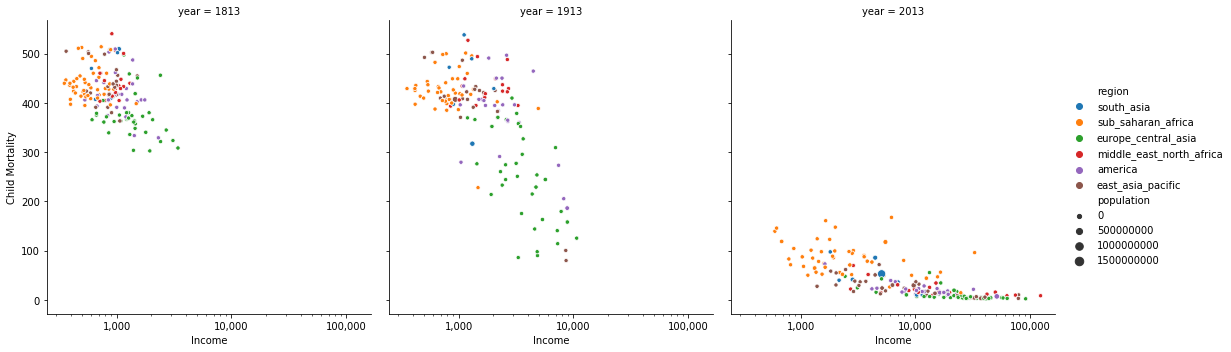

In [220]:
ax = sns.relplot(x='income',y='child_mortality',hue='region',size='population',col='year',data=centuries)

plt.xscale('log')
ax.set_xticklabels(['placeholder1','placeholder2','1,000','10,000','100,000'])
ax.set(xlabel='Income',ylabel='Child Mortality');

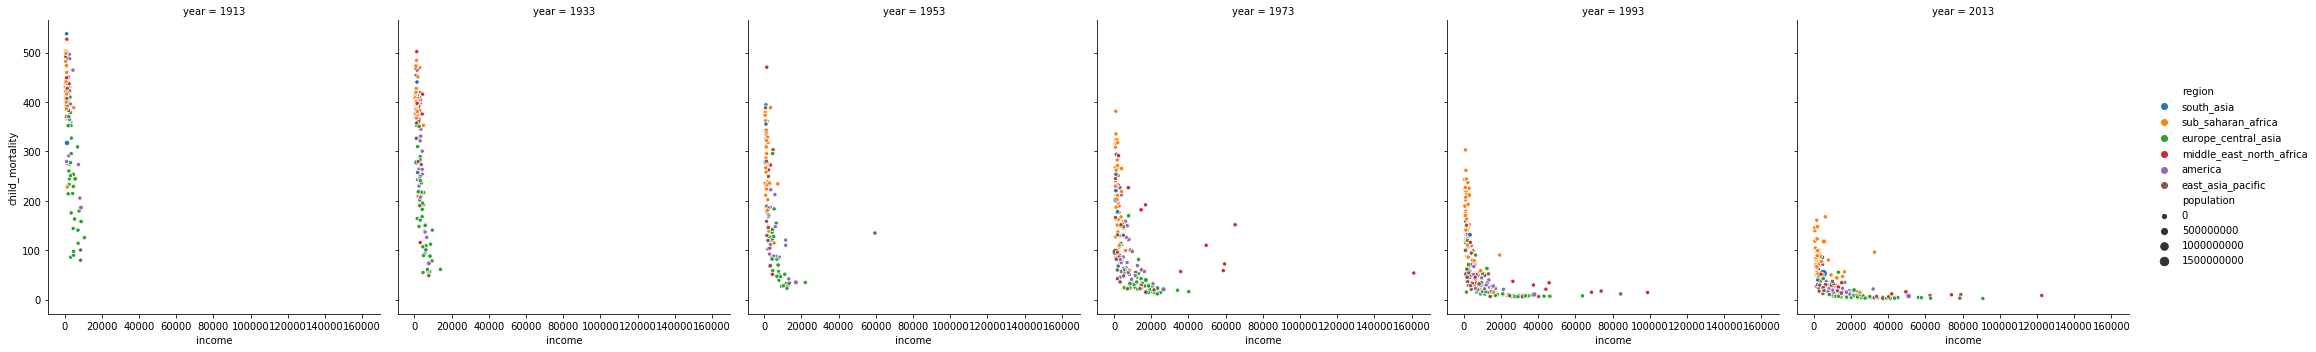

In [209]:
years = [1913, 1933, 1953, 1973, 1993, 2013]

subset = df_ch_p[df_ch_p.year.isin(years)]

sns.relplot(x='income',y='child_mortality',hue='region',size='population',col='year',data=subset);